# Path Overview
`Path` contains `Lines` and `Curves` which can be stroked or filled. `Contour` is composed of a series of connected `Lines` and `Curves`. `Path` may contain zero, one, or more `Contours`. Each `Line` and `Curve` are described by `Verb`, `Points`, and optional `Path_Conic_Weight`.

Each pair of connected `Lines` and `Curves` share common `Point`; for instance, `Path` containing two connected `Lines` are described the `Path_Verb` sequence: `Path.kMove`, `Path.kLine`, `Path.kLine`; and a `Point` sequence with three entries, sharing the middle entry as the end of the first Line and the start of the second Line.

`Path` components `Arc`, `Rect`, `Round_Rect`, `Circle`, and `Oval` are composed of `Lines` and `Curves` with as many `Verbs` and `Points` required for an exact description. Once added to `Path`, these components may lose their identity; although `Path` can be inspected to determine if it describes a single `Rect`, `Oval`, `Round_Rect`, and so on.

### Example

In [1]:
import skia
from IPython.display import display, Image

def show(draw):
    surface = skia.Surface(256, 192)
    draw(surface.getCanvas())
    image = surface.makeImageSnapshot()
    display(Image(data=image.encodeToData()))

In [2]:
def draw(canvas: skia.Canvas):
    paint = skia.Paint()
    paint.setAntiAlias(True)
    path = skia.Path()
    path.moveTo(124, 108)
    path.lineTo(172, 24)
    path.addCircle(50, 50, 30)
    path.moveTo(36, 148)
    path.quadTo(66, 188, 120, 136)
    canvas.drawPath(path, paint)
    paint.setStyle(skia.Paint.kStroke);
    paint.setColor(skia.ColorBLUE)
    paint.setStrokeWidth(3)
    canvas.drawPath(path, paint)

`Path` contains three Contours: `Line`, `Circle`, and `Quad`. `Line` is stroked but not filled. `Circle` is stroked and filled; `Circle` stroke forms a loop. `Quad` is stroked and filled, but since it is not closed, `Quad` does not stroke a loop.

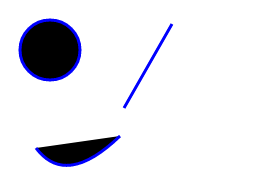

In [3]:
show(draw)

`Path` contains a `Path_Fill_Type` which determines whether overlapping `Contours` form fills or holes. `Path_Fill_Type` also determines whether area inside or outside `Lines` and `Curves` is filled.

In [4]:
def draw(canvas: skia.Canvas):
    paint = skia.Paint()
    paint.setAntiAlias(True)
    path = skia.Path()
    path.moveTo(36, 48)
    path.quadTo(66, 88, 120, 36)
    canvas.drawPath(path, paint)
    paint.setStyle(skia.Paint.kStroke)
    paint.setColor(skia.ColorBLUE)
    paint.setStrokeWidth(8)
    canvas.translate(0, 50)
    canvas.drawPath(path, paint)
    paint.setStyle(skia.Paint.kStrokeAndFill)
    paint.setColor(skia.ColorRED)
    canvas.translate(0, 50)
    canvas.drawPath(path, paint)

`Path` is drawn filled, then stroked, then stroked and filled.

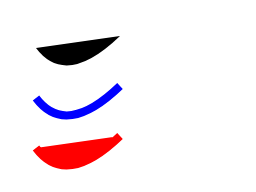

In [5]:
show(draw)

`Path` contents are never shared. Copying `Path` by value effectively creates a new `Path` independent of the original. Internally, the copy does not duplicate its contents until it is edited, to reduce memory use and improve performance.

---

`Contour` contains one or more `Verbs`, and as many `Points` as are required to satisfy `Path_Verb_Array`. First `Path_Verb` in `Path` is always `PathVerb.kMove` each `PathVerb.kMove` that follows starts a new `Contour`.

### Example

In [6]:
def draw(canvas: skia.Canvas):
    font = skia.Font()
    paint = skia.Paint()
    paint.setAntiAlias(True)
    canvas.drawString("1st contour", 150, 100, font, paint)
    canvas.drawString("2nd contour", 130, 160, font, paint)
    canvas.drawString("3rd contour", 40, 30, font, paint)
    paint.setStyle(skia.Paint.kStroke)
    path = skia.Path()
    path.moveTo(124, 108)
    path.lineTo(172, 24)
    path.moveTo(36, 148)
    path.quadTo(66, 188, 120, 136)
    path.close()
    path.conicTo(70, 20, 110, 40, 0.6)
    canvas.drawPath(path, paint)

Each `Path.moveTo` starts a new `Contour`, and content after `Path.close()` also starts a new `Contour`. Since `Path.conicTo` is not preceded by `Path.moveTo`, the first `Point` of the third `Contour` starts at the last `Point` of the second `Contour`.

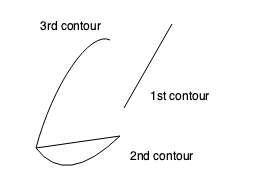

In [7]:
show(draw)

If final `PathVerb` in `Contour` is `PathVerb.kClose`, `Line` connects `Path_Last_Point` in `Contour` with first `Point`. A closed `Contour`, stroked, draws `Paint_Stroke_Join` at `Path_Last_Point` and first `Point`. Without `PathVerb.kClose` as final `Verb`, `Path_Last_Point` and first `Point` are not connected; `Contour` remains open. An open `Contour`, stroked, draws `Paint_Stroke_Cap` at `Path_Last_Point` and first `Point`.

### Example

In [8]:
def draw(canvas: skia.Canvas):
    paint = skia.Paint()
    paint.setAntiAlias(True)
    paint.setStyle(skia.Paint.kStroke)
    paint.setStrokeWidth(8)
    path = skia.Path()
    path.moveTo(36, 48)
    path.quadTo(66, 88, 120, 36)
    canvas.drawPath(path, paint)
    path.close()
    canvas.translate(0, 50)
    canvas.drawPath(path, paint)

`Path` is drawn stroked, with an open `Contour` and a closed `Contour`.

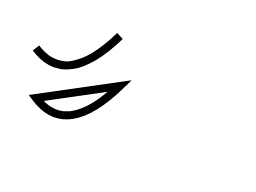

In [9]:
show(draw)

---

`Contour` length is distance traveled from first `Point` to `Path_Last_Point`, plus, if `Contour` is closed, distance from `Path_Last_Point` to first `Point`. Even if `Contour` length is zero, stroked `Lines` are drawn if `Paint_Stroke_Cap` makes them visible.

### Example

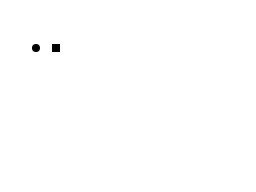

In [10]:
def draw(canvas: skia.Canvas):
    paint = skia.Paint()
    paint.setAntiAlias(True)
    paint.setStyle(skia.Paint.kStroke)
    paint.setStrokeWidth(8)
    paint.setStrokeCap(skia.Paint.Cap.kRound)
    path = skia.Path()
    path.moveTo(36, 48)
    path.lineTo(36, 48)
    canvas.drawPath(path, paint)
    path.reset()
    paint.setStrokeCap(skia.Paint.kSquare)
    path.moveTo(56, 48)
    path.close()
    canvas.drawPath(path, paint)
    
show(draw)